Primeira etapa: Limpeza de dados com pandas

# **1. Entendendo os dados**

---



O  [*default of credit card clients dataset*](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset) foi extaído do Kaggle.<br>


Nele é possível ter acesso a toda documentação.


## **1.1  Importando os pacotes e lendo os dados**

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/Breno-G/AT1-N2/refs/heads/main/dataset/UCI_Credit_Card.csv')

### Variáreis


<ol>
  <li><strong>ID</strong>: Identificador único de cada cliente.</li>
  <li><strong>LIMIT_BAL</strong>: Valor total de crédito concedido (em dólares taiwaneses), incluindo limites pessoais e adicionais.</li>
  <li><strong>SEX</strong>: Sexo do cliente: 1 para masculino, 2 para feminino.</li>
  <li><strong>EDUCATION</strong>: Grau de escolaridade: 1 = pós-graduação, 2 = universidade, 3 = ensino médio, 4 = outros, 5 e 6 = desconhecido.</li>
  <li><strong>MARRIAGE</strong>: Estado civil: 1 = casado, 2 = solteiro, 3 = outros.</li>
  <li><strong>AGE</strong>: Idade do cliente (em anos).</li>
  <li><strong>PAY_0</strong>: Situação de pagamento em setembro de 2005: -1 = pagamento em dia, 1 = atraso de 1 mês, até 9 = 9 meses ou mais de atraso.</li>
  <li><strong>PAY_2</strong>: Situação de pagamento em agosto de 2005 (mesma escala de PAY_0).</li>
  <li><strong>PAY_3</strong>: Situação de pagamento em julho de 2005 (mesma escala).</li>
  <li><strong>PAY_4</strong>: Situação de pagamento em junho de 2005 (mesma escala).</li>
  <li><strong>PAY_5</strong>: Situação de pagamento em maio de 2005 (mesma escala).</li>
  <li><strong>PAY_6</strong>: Situação de pagamento em abril de 2005 (mesma escala).</li>
  <li><strong>BILL_AMT1</strong>: Valor da fatura em setembro de 2005 (em dólares taiwaneses).</li>
  <li><strong>BILL_AMT2</strong>: Valor da fatura em agosto de 2005.</li>
  <li><strong>BILL_AMT3</strong>: Valor da fatura em julho de 2005.</li>
  <li><strong>BILL_AMT4</strong>: Valor da fatura em junho de 2005.</li>
  <li><strong>BILL_AMT5</strong>: Valor da fatura em maio de 2005.</li>
  <li><strong>BILL_AMT6</strong>: Valor da fatura em abril de 2005.</li>
  <li><strong>PAY_AMT1</strong>: Valor do pagamento realizado em setembro de 2005.</li>
  <li><strong>PAY_AMT2</strong>: Valor do pagamento realizado em agosto de 2005.</li>
  <li><strong>PAY_AMT3</strong>: Valor do pagamento realizado em julho de 2005.</li>
  <li><strong>PAY_AMT4</strong>: Valor do pagamento realizado em junho de 2005.</li>
  <li><strong>PAY_AMT5</strong>: Valor do pagamento realizado em maio de 2005.</li>
  <li><strong>PAY_AMT6</strong>: Valor do pagamento realizado em abril de 2005.</li>
  <li><strong>default.payment.next.month</strong>: Indica inadimplência no mês seguinte: 1 = sim (houve inadimplência), 0 = não.</li>
</ol>

## 1.2 Renomeando variáveis


Duas colunas podem ter nomes melhores:

In [64]:
df = df.rename(columns={'PAY_0' : 'PAY_1',
                        'default.payment.next.month' : 'DEF_NEXT_MONTH'})


## 1.3 Análise e limpeza de dados

O método .info() mostra que não será necessário fazer casting.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   SEX             30000 non-null  int64  
 3   EDUCATION       30000 non-null  int64  
 4   MARRIAGE        30000 non-null  int64  
 5   AGE             30000 non-null  int64  
 6   PAY_1           30000 non-null  int64  
 7   PAY_2           30000 non-null  int64  
 8   PAY_3           30000 non-null  int64  
 9   PAY_4           30000 non-null  int64  
 10  PAY_5           30000 non-null  int64  
 11  PAY_6           30000 non-null  int64  
 12  BILL_AMT1       30000 non-null  float64
 13  BILL_AMT2       30000 non-null  float64
 14  BILL_AMT3       30000 non-null  float64
 15  BILL_AMT4       30000 non-null  float64
 16  BILL_AMT5       30000 non-null  float64
 17  BILL_AMT6       30000 non-null 

### **Veficar dados estranhos no dataframe:**


In [66]:
for col in df.columns:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print("-" * 30)

Coluna: ID
[    1     2     3 ... 29998 29999 30000]
------------------------------
Coluna: LIMIT_BAL
[  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
------------------------------
Coluna: SEX
[2 1]
------------------------------
Coluna: EDUCATION
[2 1 3 5 4 6 0]
------------------------------
Coluna: MARR

### Limpando dados inválidos

EDUCATION: 0 não existe na documentação e 5 e 6 são desconhecidos, subtituir para 4 (outros)

MARIAGE: 0 não existe, substituir para 3 (outros
)

In [67]:
# Corrigir valores incorretos em 'EDUCATION'
df["EDUCATION"] = df["EDUCATION"].replace({0: 4, 5: 4, 6: 4})

# Corrigir valores incorretos em 'MARRIAGE'
df["MARRIAGE"] = df["MARRIAGE"].replace({0: 3})

#Verificar
for col in ['MARRIAGE', 'EDUCATION']:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print("-" * 30)

Coluna: MARRIAGE
[1 2 3]
------------------------------
Coluna: EDUCATION
[2 1 3 4]
------------------------------


A coluna PAY_[n] contem numeros negativos, que sugere que o cliente pagou antecipadamente. Mas além de não estar documentado, pode atrapalhar o processo de aprendizado de máquina.

In [68]:
#Corrigir valores negativos
pay_status_cols = ["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
for col in pay_status_cols:
    df[col] = df[col].apply(lambda x: 0 if x < 0 else x)
#Verificar
for col in ["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print("-" * 30)


Coluna: PAY_1
[2 0 1 3 4 8 7 5 6]
------------------------------
Coluna: PAY_2
[2 0 3 5 7 4 1 6 8]
------------------------------
Coluna: PAY_3
[0 2 3 4 6 7 1 5 8]
------------------------------
Coluna: PAY_4
[0 2 3 4 5 7 6 1 8]
------------------------------
Coluna: PAY_5
[0 2 3 5 4 7 8 6]
------------------------------
Coluna: PAY_6
[0 2 3 6 4 7 8 5]
------------------------------


O dados em PAY_AMT[n] e BILL_AMT[n] precisam ser normalizados para maior precisão nas próximas etapas.

In [69]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [70]:
#Normalização dos dados
scaler = StandardScaler()
bill_amt_cols = [f"BILL_AMT{i}" for i in range(1, 7)]
pay_amt_cols = [f"PAY_AMT{i}" for i in range(1, 7)]
df[bill_amt_cols + pay_amt_cols] = scaler.fit_transform(df[bill_amt_cols + pay_amt_cols])




In [71]:
df[bill_amt_cols + pay_amt_cols].describe()


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,-1.231607e-17,-3.789561e-17,6.252776e-17,5.873820e-17,-2.368476e-17,1.136868e-17,-4.736952e-18,1.373716e-17,2.084259e-17,1.800042e-17,-1.965835e-17,-1.788199e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-2.944312e+00,-1.671375e+00,-2.945672e+00,-3.315048e+00,-2.000874e+00,-6.355247e+00,-3.419416e-01,-2.569895e-01,-2.968013e-01,-3.080626e-01,-3.141361e-01,-2.933821e-01
25%,-6.473120e-01,-6.490466e-01,-6.394814e-01,-6.363293e-01,-6.340600e-01,-6.316338e-01,-2.815661e-01,-2.208358e-01,-2.746506e-01,-2.891680e-01,-2.976091e-01,-2.867584e-01
50%,-3.916884e-01,-3.931159e-01,-3.882529e-01,-3.763451e-01,-3.652683e-01,-3.660725e-01,-2.151530e-01,-1.697952e-01,-1.945673e-01,-2.123132e-01,-2.159561e-01,-2.090042e-01
75%,2.154919e-01,2.083271e-01,1.896457e-01,1.747667e-01,1.624955e-01,1.733997e-01,-3.970176e-02,-3.998021e-02,-4.093230e-02,-5.188511e-02,-5.026084e-02,-6.837436e-02
max,1.240296e+01,1.313360e+01,2.331820e+01,1.318669e+01,1.458743e+01,1.549528e+01,5.239921e+01,7.284299e+01,5.059528e+01,3.933218e+01,2.760363e+01,2.944510e+01


In [73]:
# Resultado final limpo
df_cleaned = df.copy()


# 2 Análise Exploratória (EDA)


## Vizualização por gráficos


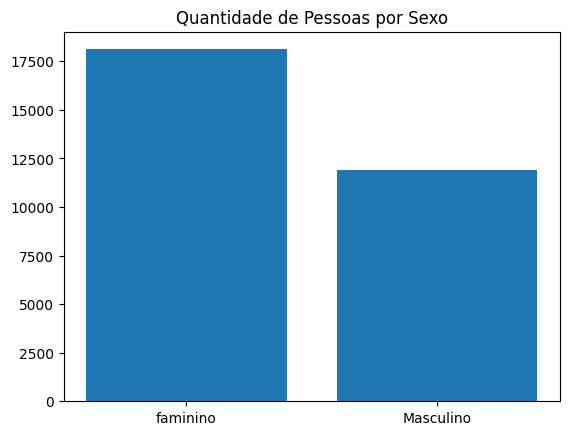

In [79]:
sex = df['SEX'].replace({1:'Masculino', 2:'faminino'}).value_counts().reset_index()
plt.bar(sex['SEX'], sex['count'])
plt.title('Quantidade de Pessoas por Sexo')
plt.show()



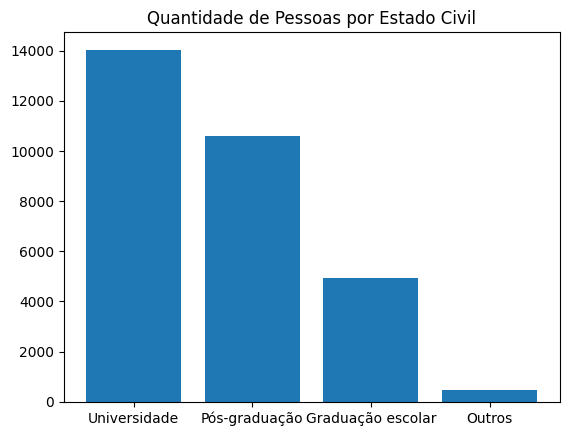

In [61]:
education = df['EDUCATION'].replace({
    1: 'Pós-graduação',
    2: 'Universidade',
    3: 'Graduação escolar',
    4: 'Outros',}).value_counts().reset_index()
plt.bar(education['EDUCATION'], education['count'])
plt.title('Quantidade de Pessoas por Estado Civil')
plt.show()

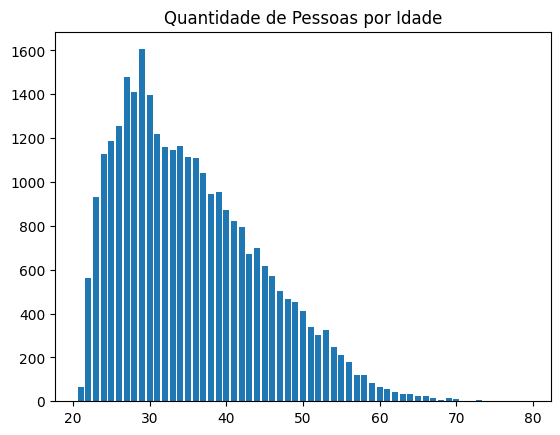

In [60]:
age = df['AGE'].value_counts().reset_index()
plt.bar(age['AGE'], age['count'])
plt.title('Quantidade de Pessoas por Idade')
plt.show()


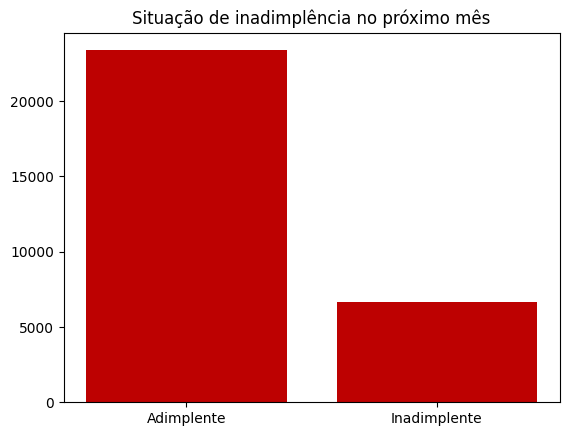

In [84]:
default_next_month = df['DEF_NEXT_MONTH'].replace(
    {0:'Adimplente', 1:'Inadimplente'}
).value_counts().reset_index()
plt.bar(default_next_month['DEF_NEXT_MONTH'], default_next_month['count'], color='#BD0101')
plt.title('Situação de inadimplência no próximo mês')
plt.show()




> Com os gráficos é possível observar algumas informações importantes. Em especial a "Situação de inadimplência no próximo mês", pois nela contem o alvo de para o aprendizado de máquina do projeto.


  





In [ ]:
# correlacao = df[['PAY_1', 'BILL_AMT1', 'PAY_AMT1', 'LIMIT_BAL']].corr()
# print("Matriz de Correlação: \n",correlacao)
#
# plt.imshow(correlacao, cmap='coolwarm', interpolation='none')
# plt.colorbar()
# plt.xticks(range(len(correlacao)), correlacao.columns, rotation=45)
# plt.yticks(range(len(correlacao)), correlacao.columns)
# plt.title('Mapa de Correlação')
# plt.show()